# Revisiting Andrew with HURDAT2
https://www.nhc.noaa.gov/data/#hurdat

---

# Import ALL the packages.

**We _probably_ don't need all of these, but it's a collection of packages that I import with most of my notebooks at this point. It's kinda' like Pokémon--gotta' catch 'em all!**

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
from metpy import units as units, calc as mpcalc
from cartopy import crs as ccrs, feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import requests

---

Here we define a function to convert the lat and lon data to floats. We do this before importing the data so we can use it in the import.

In [2]:
def lat_lon_to_float(v):
    """
    Convert Strings from NHC to float locations.
    """
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1]) * multiplier

# Import the DATA!

**We know which columns we want thanks to NOAA's details on the format.**

https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-atl-1851-2021.pdf

In [3]:
data = []
with open('hurdat2-1851-2024-040425.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            cent_press = float(location_line[7].strip())
            
            data.append([storm_number, storm_name, storm_status, max_speed, storm_lat, storm_lon, cent_press, dt])

**Now we'll make the data into a Pandas dataframe, selecting the necessary columns of the wider data.**

In [4]:
df = pd.DataFrame(data, columns=['Storm Number', 'Storm Name', 'Storm Status', 'Max Speed', 'Lat', 'Lon','Central Pressure', 'Time'])

# Data go from 1851 to 2024!
**We'll select the year (1992), then we'll select the storm (ANDREW)**

In [5]:
df = df[(df['Time'] > datetime(1992,1,1)) & (df['Time'] < datetime (1993,1,1))]
df = df.drop(df[df['Storm Name'] != 'ANDREW'].index)
df = df.reset_index(drop = True)
df

,Storm Number,Storm Name,Storm Status,Max Speed,Lat,Lon,Central Pressure,Time
0,AL041992,ANDREW,TD,25.0,10.8,-35.5,1010.0,1992-08-16 18:00:00
1,AL041992,ANDREW,TD,30.0,11.2,-37.4,1009.0,1992-08-17 00:00:00
2,AL041992,ANDREW,TD,30.0,11.7,-39.6,1008.0,1992-08-17 06:00:00
3,AL041992,ANDREW,TS,35.0,12.3,-42.0,1006.0,1992-08-17 12:00:00
4,AL041992,ANDREW,TS,35.0,13.1,-44.2,1003.0,1992-08-17 18:00:00
5,AL041992,ANDREW,TS,40.0,13.6,-46.2,1002.0,1992-08-18 00:00:00
6,AL041992,ANDREW,TS,45.0,14.1,-48.0,1001.0,1992-08-18 06:00:00
7,AL041992,ANDREW,TS,45.0,14.6,-49.9,1000.0,1992-08-18 12:00:00
8,AL041992,ANDREW,TS,45.0,15.4,-51.8,1000.0,1992-08-18 18:00:00
9,AL041992,ANDREW,TS,45.0,16.3,-53.5,1001.0,1992-08-19 00:00:00


**We'll check the shape (because it's easier than counting all the lines ourselves) and see how many data points (with resepct to time) there are.**

In [6]:
df.shape

(52, 8)

In [7]:
Start_Andrew = df.Time[0]
End_Andrew = df.Time[51]

In [8]:
print("Start =  ", Start_Andrew)
print('End =  ', End_Andrew)

Start =   1992-08-16 18:00:00
End =   1992-08-28 06:00:00


**Breaking down to 6hr windows...**

In [9]:
totalTime = End_Andrew - Start_Andrew

In [10]:
totalTime

Timedelta('11 days 12:00:00')

In [11]:
totalHours = (11*24) + 12

In [12]:
hour6 = totalHours/6
hour6

46.0

**Looks like we've got 46 6-hour intervals, so we should have 46 frames for our entire Andrew timeline.**

---

# Let's start getting our data in the correct format.

**NOTE: Wind speed is in knots. Pressure is already in millibars.**

1 knot = 1.15078 mph

Let's define that as a function

In [13]:
def k_mph(v):
    
    conversion = 1.15078
    
    return float(v)*conversion    

In [14]:
df['Max Speed (mph)'] = df['Max Speed'].apply(k_mph)

**Quick check...**

In [15]:
print('Min Max Speed: ', df['Max Speed'].min(), ' (knots)')
print('Max Speed: ', df['Max Speed'].max(), ' (knots)')
print('Min Max Speed: ', df['Max Speed (mph)'].min(), ' (mph)')
print('Max Speed: ', df['Max Speed (mph)'].max(), ' (mph)')

Min Max Speed:  20.0  (knots)
Max Speed:  150.0  (knots)
Min Max Speed:  23.0156  (mph)
Max Speed:  172.617  (mph)


**(Pressure is in millibars, which is how Hurricanes are typically reported. No conversion is needed)**

---

# Making time...

**We want to print our start and end in the title, so we need a string.**

In [16]:
Begin = Start_Andrew.strftime('%m-%d %H:%M')
End = End_Andrew.strftime('%m-%d %H:%M')

In [17]:
# Create a custom locator for 6-hour intervals
six_hour_interval_locator = mdates.HourLocator(interval=6)

# Create a custom date formatter to display the full datetime
date_format = mdates.DateFormatter('%m-%d %H:%M')


# Plotting the Timeseries

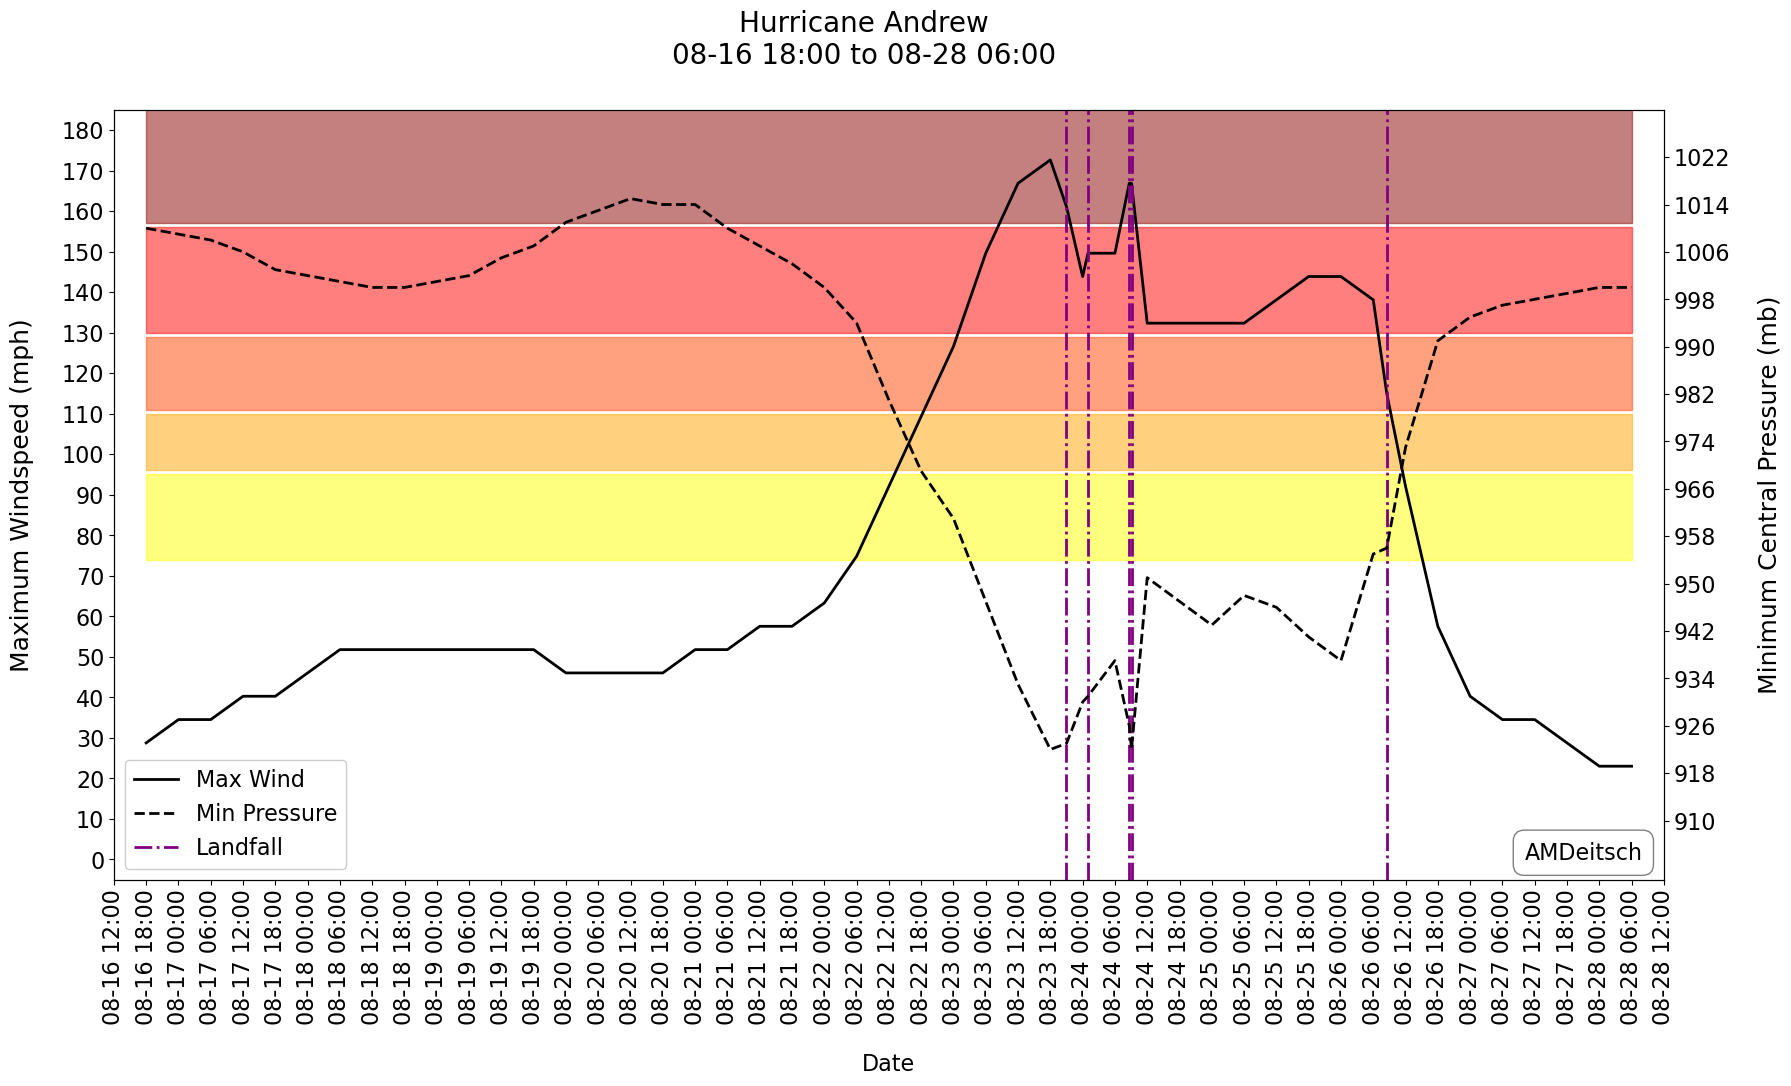

In [18]:
# Define figure
fig = plt.figure(figsize=(20,10))
widths = [7,]
heights = [5,]#, 5, 1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                                          height_ratios=heights)
# Add main title
fig.suptitle(f'Hurricane Andrew\n{Begin} to {End}', fontsize = 20)#, pad = 10)# y= 1.01)

# Add actual plot
ax1 = fig.add_subplot(spec[0,0])

# Set title
#ax1.set_title('Maximum Windspeed (mph) and Minimum Central Pressure (mb)', fontsize = 20, pad = 10)

# Add secondary y axis
ax2 = ax1.twinx()


# Create plots
item1, = ax1.plot(df['Time'], df['Max Speed (mph)'], linestyle = '-', color = 'black', linewidth =2, label = 'Max Wind')
item2, = ax2.plot(df['Time'], df['Central Pressure'], linestyle = '--', color = 'black', linewidth = 2, label = 'Min Pressure')

# Add axis labels
ax1.set_ylabel('Maximum Windspeed (mph)', color = 'black', fontsize = 18, labelpad = 20)
ax2.set_ylabel('Minimum Central Pressure (mb)', color = 'black', fontsize = 18, labelpad = 20)
ax1.set_xlabel('Date', fontsize = 16, labelpad = 20)

# Set tick labels and size
ax1.tick_params(axis = 'y', colors = 'black', labelsize = 16)
ax2.tick_params(axis = 'y', colors = 'black', labelsize = 16)
ax1.tick_params(axis = 'x', colors = 'black', labelsize = 16, labelrotation = 90) 

# Set x axis to 6h steps
ax1.xaxis.set_major_locator(six_hour_interval_locator)
ax1.xaxis.set_major_formatter(date_format)

# Shrink x axis so there aren't so many extra dates before and after Andrew.
ax1.set_xlim(df['Time'].min() - pd.Timedelta(hours=6), df['Time'].max() + pd.Timedelta(hours=6))

# Convert datetime strings to Timestamp objects
HUstart = pd.Timestamp('1992-08-22 06:00:00')
HUend = pd.Timestamp('1992-08-26 12:00:00')

landfall_times = [
    pd.Timestamp('1992-08-23 21:00:00'),
    pd.Timestamp('1992-08-24 01:00:00'),
    pd.Timestamp('1992-08-24 08:40:00'),
    pd.Timestamp('1992-08-24 09:05:00'),
    pd.Timestamp('1992-08-26 08:30:00')
]

# Add vertical lines for landfall times
for landfall_time in landfall_times:
    item3 = ax1.axvline(landfall_time, color='purple', linestyle='-.', linewidth=2, label='Landfall')



ax1.fill_between(df['Time'], 74,95, color='yellow', alpha=0.5, label='Category 1 Hurricane')
# Category 2 Hurricane (96 <= wind <= 110 mph)
ax1.fill_between(df['Time'], 96, 110, color='orange', alpha=0.5, label='Category 2 Hurricane')
# Category 3 Hurricane (111 <= wind <= 129 mph)
ax1.fill_between(df['Time'], 111, 129, color='orangered', alpha=0.5, label='Category 3 Hurricane')
# Category 4 Hurricane (130 <= wind <= 156 mph)
ax1.fill_between(df['Time'], 130, 156, color='red', alpha=0.5, label='Category 4 Hurricane')
# Category 5 Hurricane (wind >= 157 mph)
ax1.fill_between(df['Time'], 157, 190, color = 'darkred', alpha = 0.5, label='Category 5 Hurricane')


# That almost worked, so we just want to scale the y axis so the whole frame is filled top to bottom...
ax1.set_ylim(-5, 185)

# Very close. Let's just change our axis increments and limits.

# Set the y-axis ticks for ax1 at increments of 10
ax1.set_yticks(range(0, int(max(df['Max Speed (mph)']) + 10), 10))

# Set the y-axis ticks for ax2 at increments of 10
ax2.set_yticks(range(int(min(df['Central Pressure'])-12), int(max(df['Central Pressure']) + 10), 8))
ax2.set_ylim(900, 1030)

# Use plot definitions to create list for combined legend
items = [item1, item2, item3]
labels = [item.get_label() for item in items]
props2 = dict(boxstyle='round', facecolor='white', alpha=0.5, pad=0.5)

# Add combined legend
ax1.legend(items, labels, loc=3, fontsize=16, framealpha=1)
ax1.text(0.91, 0.05, 'AMDeitsch', transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props2)

plt.savefig('Andrew_SlpWind.png', dpi = 720, bbox_inches = 'tight')